In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
pd.set_option('display.max_columns',100)

In [97]:
df=pd.read_csv('declinestats.csv')

In [98]:
df1=pd.read_csv('cleanData.csv')

In [99]:
newData=df1[['loan_amnt','title','fico_range_low','dti','zip_code','addr_state','emp_length','policy_code','set','timestamp']]

In [100]:
newData=newData.append(df,ignore_index=True)

In [101]:
newData['yStatus'] = newData['set'].apply(lambda x: 1 if x == "accepted" else 0)

In [102]:
def elength(a):
    if (a=='n/a'):
        return 0
    elif (a=='10+ years'):
        return 10
    elif (a=='1 year'):
        return 1
    elif (a=='< 1 year'):
        return 0.5
    else:
        return float(a.strip(' years'))
    
newData['yemp_length'] = newData['emp_length'].map(lambda a: elength(a))


In [106]:
colsToKeep=['loan_amnt','fico_range_low','dti','yemp_length','policy_code']

In [107]:
X=newData[colsToKeep]

In [108]:
y=newData['yStatus']

In [109]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [110]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [111]:
y_pred = model.predict(X_test)

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3216939    8949]
 [    108  302817]]


In [113]:
#Compute FPR and TPR
from sklearn.metrics import roc_curve
preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


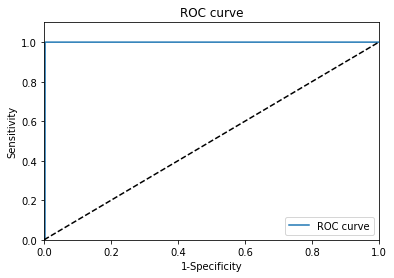

In [121]:
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()